In [ ]:
#importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#getting the titanic data as input
train = pd.read_csv("/content/train.csv")
print(train.shape)

(891, 12)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#cheking for missing data
NAs = pd.concat([train.isnull().sum()],axis=1,keys=["Train"])
NAs[NAs.sum(axis=1)>0]

,Train
Age,177
Cabin,687
Embarked,2


In [ ]:
#filling missing age values with mean
train["Age"] = train["Age"].fillna(train["Age"].mean())


In [ ]:
#filling missing Embarked values mith most common value
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [ ]:
#filling missing Cabin values with most common value
train["Cabin"] = train["Cabin"].fillna(train["Cabin"].mode()[0])

In [ ]:
train["Pclass"] = train["Pclass"].apply(str)

In [ ]:
#Getting Dummies from all the other categorical vars
for col in train.dtypes[train.dtypes=="object"].index:
  for_dummy = train.pop(col)
  train = pd.concat([train,pd.get_dummies(for_dummy,prefix=col)],axis = 1)
print(train.shape)
train.head()

(891, 1733)


,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
labels = train.pop("Survived")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,labels,test_size = 0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate,thersholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc*100

83.30895008605852

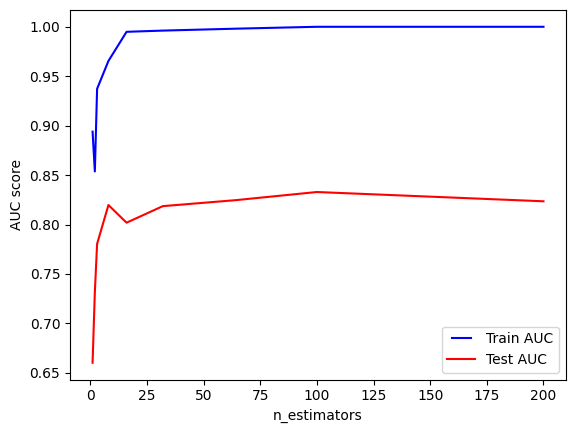

In [ ]:
n_estimators = [1,2,3,8,16,32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
  rf = RandomForestClassifier(n_estimators=estimator,n_jobs =-1 )
  rf.fit(x_train,y_train)
  train_pred = rf.predict(x_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(x_test)
  false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test,y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate )
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,"b",label ="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map = {line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()